In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#0 -> no rains 1-> rain
temperature = np.array([60,65,70,75,80,85,90,95,100])
rain = np.array([0,0,0,0,1,1,1,1,1])

In [9]:
class LogisticRegression:
    def __init__(self,lr=0.001,epochs=1000):
        self.lr = lr
        self.epochs =epochs
        self.weight = None
        self.bias = None
        self.losses = []
    def fit(self,X,y):
        n_samples,n_features = X.shape
        np.random.seed(42)
        self.weight = np.random.randn(n_features)
        self.bias = np.random.randn()
        X =(X-X.mean())/ X.std()
        for _ in range(self.epochs):
            linear_model_output = np.dot(X, self.weight) + self.bias
            y_predicted = self._sigmoid(linear_model_output)
            error = y_predicted - y

            gradient_weight = (1/n_samples)*np.dot(X.T, error)
            gradient_bias = (1/n_samples)*np.sum(error)

            self.weight -= self.lr * gradient_weight
            self.bias -= self.lr * gradient_bias

            loss =  - np.mean(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
            self.losses.append(loss)
    def predict(self, X):
        X =(X-X.mean())/ X.std()
        linear_model_output = np.dot(X,self.weight) + self.bias
        y_predicted = self._sigmoid(linear_model_output)
        return y_predicted
    def _sigmoid(self,z):
        z = np.clip(z,-500,500)
        return 1/(1+np.exp(-z))





In [10]:
model = LogisticRegression(0.01,2000)
X = temperature.reshape(-1,1)
model.fit(X,rain)

In [11]:
model_prediction = model.predict(X)
print(model_prediction)

[0.01993683 0.0564961  0.14984598 0.34159596 0.60430355 0.81802873
 0.92973776 0.97496892 0.99135342]


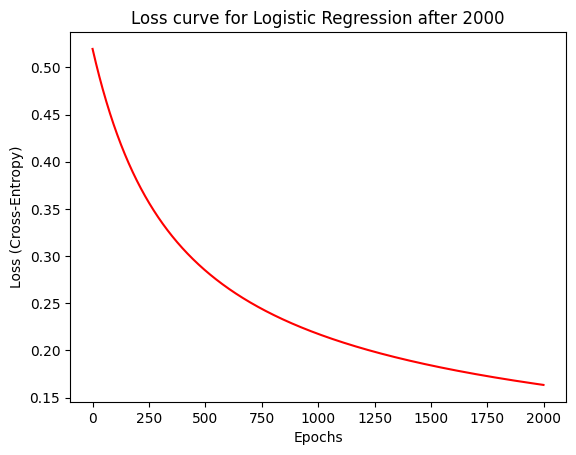

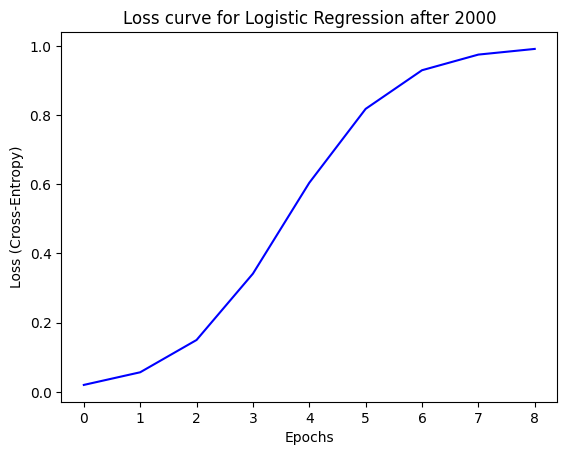

In [13]:
plt.plot(model.losses, color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.show()
plt.plot(model.predict(X), color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.show()